# Assignment on ML Prediction Using Tips Dataset

In [14]:
# !pip install scikit-learn

# import the necessary library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)
import joblib
print("All libraries are successfully loaded!")

All libraries are successfully loaded!


### Loading in-built tips dataset from seaborn

In [15]:
tips = sns.load_dataset("tips")

# To display dataset (5 first records)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Quick Summary of Key Columns in tips dataset:

**total_bill**: *Total bill (cost of the meal) before tip.*

**tip**: *The gratuity (extra amount) given to the server.*

**sex**: *Gender of the person paying.*

**smoker**: *Whether the party included smokers.*

**day**: *Day of the week (Thur, Fri, Sat, Sun).*

**time**: *Time of day (Lunch or Dinner).*

**size**: *Number of people in the dining party.* (source: ChatGPT)

### From the above information, it can be deduced that "tip" depends on "total_bill". Therefore, dependent variable is "tip" -> Y = tip and X = total_bill.

# Understanding the Data

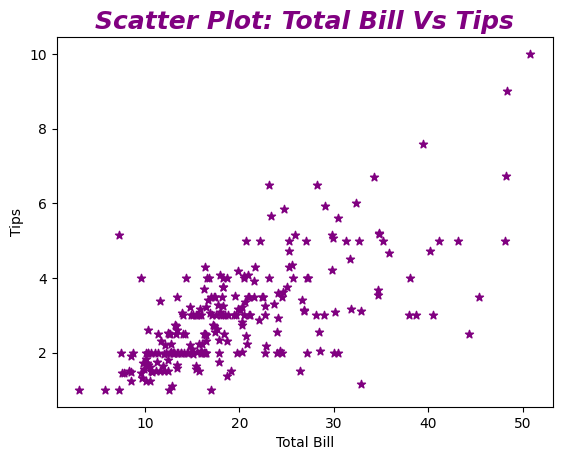

In [4]:
plt.scatter(tips['total_bill'], tips['tip'], color = "purple", marker = "*")
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.title("Scatter Plot: Total Bill Vs Tips", color= 'purple', fontsize = 18, fontweight = "bold", fontstyle= "italic")
plt.show()          

# Preparing Data fo Machine Learning

In [5]:
# Remame data as x and y
x = tips[["total_bill"]]
y = tips[["tip"]]

# Split your data into trianing and testing
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2, random_state = 42)

# Buiding the Model

In [6]:
# creat and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred =model.predict(x_test)

In [12]:
# Display the first few predictions
print("First few predictions:", np.round(y_pred[:10], 2))

First few predictions: [[3.05]
 [1.86]
 [3.55]
 [3.69]
 [2.32]
 [2.84]
 [3.97]
 [2.26]
 [2.51]
 [2.57]]


# Understanding the Model

In [38]:
print(f"Slope (m): {model.coef_[0][0]:.2f}")
print(f"Intercept (b): {model.intercept_[0]:.2f}")

Slope (m): 0.11
Intercept (b): 0.93


### The Model Equation = Price(y) = (Slope * Size) + Intercept, Y = mx + b

#    Y = 0.11x + 0.93

# Evaluation of the Model
Evaluation of model by calculating Mean Square Error(mse), Root of Square Error(rmse) and R-Square Score(r2).

In [39]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Square Error: {mse:.2f}")
print(f"Root of Mean Square Error: {rmse:.2f}")
print(f"R-Square Score: {r2:.2f}")

Mean Square Error: 0.57
Root of Mean Square Error: 0.75
R-Square Score: 0.54


# Visualize the Predicted tip vs Actual tip

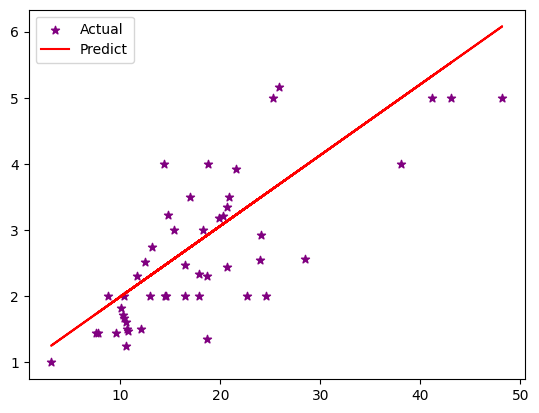

In [40]:
plt.scatter(x_test, y_test, color = 'purple', label = 'Actual', marker= "*")
plt.plot(x_test, y_pred, color='red', label= 'Predict')
plt.legend()
plt.show()

# Save Model

In [41]:
joblib.dump(model, "tip_predictor.joblib")

['tip_predictor.joblib']

# Using Saved Model for Prediction of New Values

In [42]:
loaded_model = joblib.load("tip_redictor.joblib")

In [47]:
low_total_bill = pd.DataFrame([[5.16]], columns=['total_bill'])
predicted_tip = loaded_model.predict(low_total_bill)
predicted_tip = round(predicted_tip.item(), 2)
print(f" The predicted tip for total bill of 70.16 is ${predicted_tip}")

 The predicted tip for total bill of 70.16 is $1.48


In [51]:
high_total_bill = pd.DataFrame([[70.05]], columns=['total_bill'])
predicted_tip = loaded_model.predict(high_total_bill)
predicted_tip = round(predicted_tip.item(), 2)
print(f" The predicted tip for total bill of 70.16 is ${predicted_tip}")

 The predicted tip for total bill of 70.16 is $8.42
